In [1]:
#! pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
  Using cached psycopg2-2.9.6-cp38-cp38-win_amd64.whl (1.2 MB)


In [5]:
import json
import os
import psycopg2
import pandas as pd
import requests
import numpy as np
import datetime  


 #for coord in cursor.fetchall():
coordinates = [(46.21662, 6.10587), (46.17448, 6.11830), (46.21582, 6.14532), (46.33383, 6.18880),
                   (46.42008, 6.26162), (46.50153, 6.40342), (46.52582, 6.60641), (46.42974, 6.91161),
                   (46.26384, 6.94850), (46.10285, 7.07649), (46.22986, 7.35286), (46.29275, 7.53190),
                   (46.61724, 7.05417), (46.79824, 7.14798), (46.89191, 7.31273), (46.94587, 7.44213),
                   (46.75538, 7.62352), (46.68987, 7.87100), (47.21045, 7.54093), (47.47479, 7.59471),
                   (47.54152, 7.59835), (47.48887, 7.73008), (47.21140, 7.45222), (47.22174, 7.76117),
                   (47.38251, 8.04421), (47.18255, 8.09340), (47.07459, 8.27662), (47.02510, 8.30308),
                   (46.96451, 8.35586), (46.89411, 8.24322), (46.89069, 8.63596), (47.18849, 8.47317),
                   (47.15779, 8.51558), (47.43371, 8.35498), (47.50540, 8.54949), (47.57664, 8.25703),
                   (47.41938, 8.50698), (47.45985, 8.58260), (47.38494, 8.51933), (47.28289, 8.57441),
                   (47.35328, 8.72416), (47.24849, 8.72382), (47.70044, 8.63665), (47.55703, 8.88147),
                   (47.46525, 9.03635), (47.44454, 9.37356), (47.47724, 9.48589), (47.46972, 9.01890),
                   (47.46789, 9.00770), (47.64518, 9.19132), (47.26389, 9.11548), (47.64633, 9.18024),
                   (47.47717, 9.48887), (47.40720, 9.60201), (47.15413, 9.50656), (46.85053, 9.47706),
                   (46.53313, 9.87534), (46.17456, 9.00291), (46.00737, 8.93821), (45.86698, 8.98041)]
    
    
# API parameters
API_KEY = "f929f8bae1cf9df1f10a9a2a99661e67"
units = "metric"
current_weather = []

# Fetch station's  weather data
for i in range(len(coordinates)):
    LAT = coordinates[i][0]
    LON = coordinates[i][1]
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={LAT}&lon={LON}&&units={units}&appid={API_KEY}"
    response = requests.get(url)
    r = json.loads(response.text)
    current_weather.append(r)
    #time.sleep(1)
        


In [6]:
current_weather

[{'coord': {'lon': 6.1059, 'lat': 46.2166},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 25.16,
   'feels_like': 24.7,
   'temp_min': 24.59,
   'temp_max': 27.1,
   'pressure': 1022,
   'humidity': 37},
  'visibility': 10000,
  'wind': {'speed': 8.49, 'deg': 133, 'gust': 12.07},
  'clouds': {'all': 0},
  'dt': 1687605339,
  'sys': {'type': 1,
   'id': 6928,
   'country': 'CH',
   'sunrise': 1687578269,
   'sunset': 1687635073},
  'timezone': 7200,
  'id': 2661151,
  'name': 'Cointrin',
  'cod': 200},
 {'coord': {'lon': 6.1183, 'lat': 46.1745},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 25.18,
   'feels_like': 24.72,
   'temp_min': 24.7,
   'temp_max': 26.77,
   'pressure': 1022,
   'humidity': 37},
  'visibility': 10000,
  'wind': {'speed': 8.49, 'deg': 133, 'gust': 12.07},
  'clouds': {'all': 0

In [3]:
# transform data into dataframe
df = pd.DataFrame(current_weather)
df.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod
0,"{'lon': 8.9367, 'lat': 47.515}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 23.54, 'feels_like': 23.33, 'temp_min...",10000,"{'speed': 2.05, 'deg': 33, 'gust': 2.16}",{'all': 7},1686217778,"{'type': 2, 'id': 19989, 'country': 'CH', 'sun...",7200,2659724,Matzingen,200
1,"{'lon': 8.9366, 'lat': 47.515}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 23.54, 'feels_like': 23.33, 'temp_min...",10000,"{'speed': 2.05, 'deg': 33, 'gust': 2.16}",{'all': 7},1686217779,"{'type': 2, 'id': 19989, 'country': 'CH', 'sun...",7200,2659724,Matzingen,200
2,"{'lon': 8.1975, 'lat': 47.1303}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 21.91, 'feels_like': 21.64, 'temp_min...",10000,"{'speed': 1.34, 'deg': 80, 'gust': 3.58}",{'all': 40},1686217779,"{'type': 1, 'id': 6933, 'country': 'CH', 'sunr...",7200,2658631,Sempach,200
3,"{'lon': 7.6308, 'lat': 46.7725}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 22.66, 'feels_like': 22.21, 'temp_min...",10000,"{'speed': 2.24, 'deg': 350, 'gust': 4.47}",{'all': 40},1686217779,"{'type': 2, 'id': 2008883, 'country': 'CH', 's...",7200,2658494,Steffisburg,200
4,"{'lon': 7.5117, 'lat': 46.8143}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 22.8, 'feels_like': 22.52, 'temp_min'...",10000,"{'speed': 1.54, 'deg': 0}",{'all': 40},1686217779,"{'type': 2, 'id': 2000117, 'country': 'CH', 's...",7200,7286575,Mühlethurnen,200


In [4]:
current_weather

[{'coord': {'lon': 8.9367, 'lat': 47.515},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 23.54,
   'feels_like': 23.33,
   'temp_min': 20.66,
   'temp_max': 25.52,
   'pressure': 1013,
   'humidity': 53,
   'sea_level': 1013,
   'grnd_level': 962},
  'visibility': 10000,
  'wind': {'speed': 2.05, 'deg': 33, 'gust': 2.16},
  'clouds': {'all': 7},
  'dt': 1686217778,
  'sys': {'type': 2,
   'id': 19989,
   'country': 'CH',
   'sunrise': 1686194876,
   'sunset': 1686251927},
  'timezone': 7200,
  'id': 2659724,
  'name': 'Matzingen',
  'cod': 200},
 {'coord': {'lon': 8.9366, 'lat': 47.515},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 23.54,
   'feels_like': 23.33,
   'temp_min': 20.66,
   'temp_max': 25.52,
   'pressure': 1013,
   'humidity': 53,
   'sea_level': 1013,
   'grnd_level': 962},
  'visibi

In [7]:
# Define function to extract weather values from each mobility station
def extract_weather_values(location): 
    try:
        sea_level = location['main']['sea_level']
    except KeyError:
        sea_level = None
            
    try:        
            ground_level = location['main']['grnd_level']
    except KeyError:
            ground_level = None
            
    try:        
            wind_gust = location['wind']['gust']
    except KeyError:
            wind_gust = None
        
    values = {        
            'id_weather': location['sys']['id'],
            'weather_main': location['weather'][0]['main'],
            'weather_description': location['weather'][0]['description'],
            'temp': location['main']['temp'],
            'temp_fells': location['main']['feels_like'],
            'temp_min': location['main']['temp_min'],
            'temp_max': location['main']['temp_max'],
            'pressure': location['main']['pressure'],
            'humidity': location['main']['humidity'],
            'sea_level': sea_level,
            'ground_level': ground_level,
            'visibility': location['visibility'],       
            'wind_speed': location['wind']['speed'],
            'wind_degrees': location['wind']['deg'],
            'wind_gust': wind_gust,
            'datetime': datetime.datetime.utcfromtimestamp(location['dt']/1000.0).isoformat(),
            'country_code': location['sys']['country'],
            'sunrise': datetime.datetime.utcfromtimestamp(location['sys']['sunrise']/1000.0).isoformat(),
            'sunset': datetime.datetime.utcfromtimestamp(location['sys']['sunset']/1000.0).isoformat(),        
            'timezone': location['timezone'],
            'location': location['name'],      
        }
                
    return values
        
# Extract values for all coordinate locations
list_locations = []
for i, weather_data in enumerate(current_weather):
    values = extract_weather_values(weather_data)
    list_locations.append(values)

In [10]:
# transform data into dataframe
df = pd.DataFrame(list_locations)
df.head()

,id_weather,weather_main,weather_description,temp,temp_fells,temp_min,temp_max,pressure,humidity,sea_level,...,visibility,wind_speed,wind_degrees,wind_gust,datetime,country_code,sunrise,sunset,timezone,location
0,6928,Clear,clear sky,25.16,24.70,24.59,27.10,1022,37,NaN,...,10000,8.49,133,12.07,1970-01-20T12:46:45.339000,CH,1970-01-20T12:46:18.269000,1970-01-20T12:47:15.073000,7200,Cointrin
1,6928,Clear,clear sky,25.18,24.72,24.70,26.77,1022,37,NaN,...,10000,8.49,133,12.07,1970-01-20T12:46:45.339000,CH,1970-01-20T12:46:18.277000,1970-01-20T12:47:15.059000,7200,Plan-les-Ouates
2,6928,Clear,clear sky,25.41,25.08,24.76,27.27,1022,41,NaN,...,10000,8.49,133,12.07,1970-01-20T12:46:45.339000,CH,1970-01-20T12:46:18.260000,1970-01-20T12:47:15.063000,7200,Les Pâquis
3,19860,Clear,clear sky,25.62,25.28,24.63,27.14,1020,40,NaN,...,10000,7.72,50,NaN,1970-01-20T12:46:45.339000,CH,1970-01-20T12:46:18.219000,1970-01-20T12:47:15.083000,7200,Founex
4,19860,Clouds,scattered clouds,25.88,25.65,24.53,27.04,1019,43,NaN,...,10000,1.34,84,4.02,1970-01-20T12:46:45.340000,CH,1970-01-20T12:46:18.180000,1970-01-20T12:47:15.088000,7200,Gland


# EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_weather           60 non-null     int64  
 1   weather_main         60 non-null     object 
 2   weather_description  60 non-null     object 
 3   temp                 60 non-null     float64
 4   temp_fells           60 non-null     float64
 5   temp_min             60 non-null     float64
 6   temp_max             60 non-null     float64
 7   pressure             60 non-null     int64  
 8   humidity             60 non-null     int64  
 9   sea_level            13 non-null     float64
 10  ground_level         13 non-null     float64
 11  visibility           60 non-null     int64  
 12  wind_speed           60 non-null     float64
 13  wind_degrees         60 non-null     int64  
 14  wind_gust            35 non-null     float64
 15  datetime             60 non-null     objec

In [24]:
df.describe()

,id_weather,temp,temp_fells,temp_min,temp_max,pressure,humidity,visibility,wind_speed,wind_degrees,timezone
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.000000,60.000000,60.0
mean,1.242713e+06,25.021167,24.790333,22.972667,27.256667,1022.283333,46.816667,10000.0,4.884167,105.950000,7200.0
std,9.854348e+05,1.642320,1.677964,1.618569,1.422062,4.294623,6.468939,0.0,2.108731,101.832768,0.0
min,6.928000e+03,18.030000,17.320000,17.980000,21.840000,994.000000,29.000000,10000.0,1.160000,5.000000,7200.0
25%,1.992000e+04,24.250000,24.110000,22.162500,26.720000,1022.000000,42.750000,10000.0,3.120000,40.750000,7200.0
50%,2.007137e+06,24.960000,24.705000,22.625000,27.285000,1022.000000,47.000000,10000.0,5.015000,58.000000,7200.0
75%,2.034884e+06,25.462500,25.305000,23.735000,27.797500,1024.000000,52.250000,10000.0,6.690000,118.000000,7200.0
max,2.082894e+06,29.850000,30.260000,28.000000,30.880000,1028.000000,62.000000,10000.0,9.170000,360.000000,7200.0


In [20]:
# drop columns with null values
df = df.drop(['sea_level', 'ground_level', 'wind_gust'], axis=1)


KeyError: "['sea_level', 'ground_level', 'wind_gust'] not found in axis"

In [21]:
df.columns

Index(['id_weather', 'weather_main', 'weather_description', 'temp',
       'temp_fells', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'visibility', 'wind_speed', 'wind_degrees', 'datetime', 'country_code',
       'sunrise', 'sunset', 'timezone', 'location'],
      dtype='object')

<AxesSubplot: xlabel='location'>

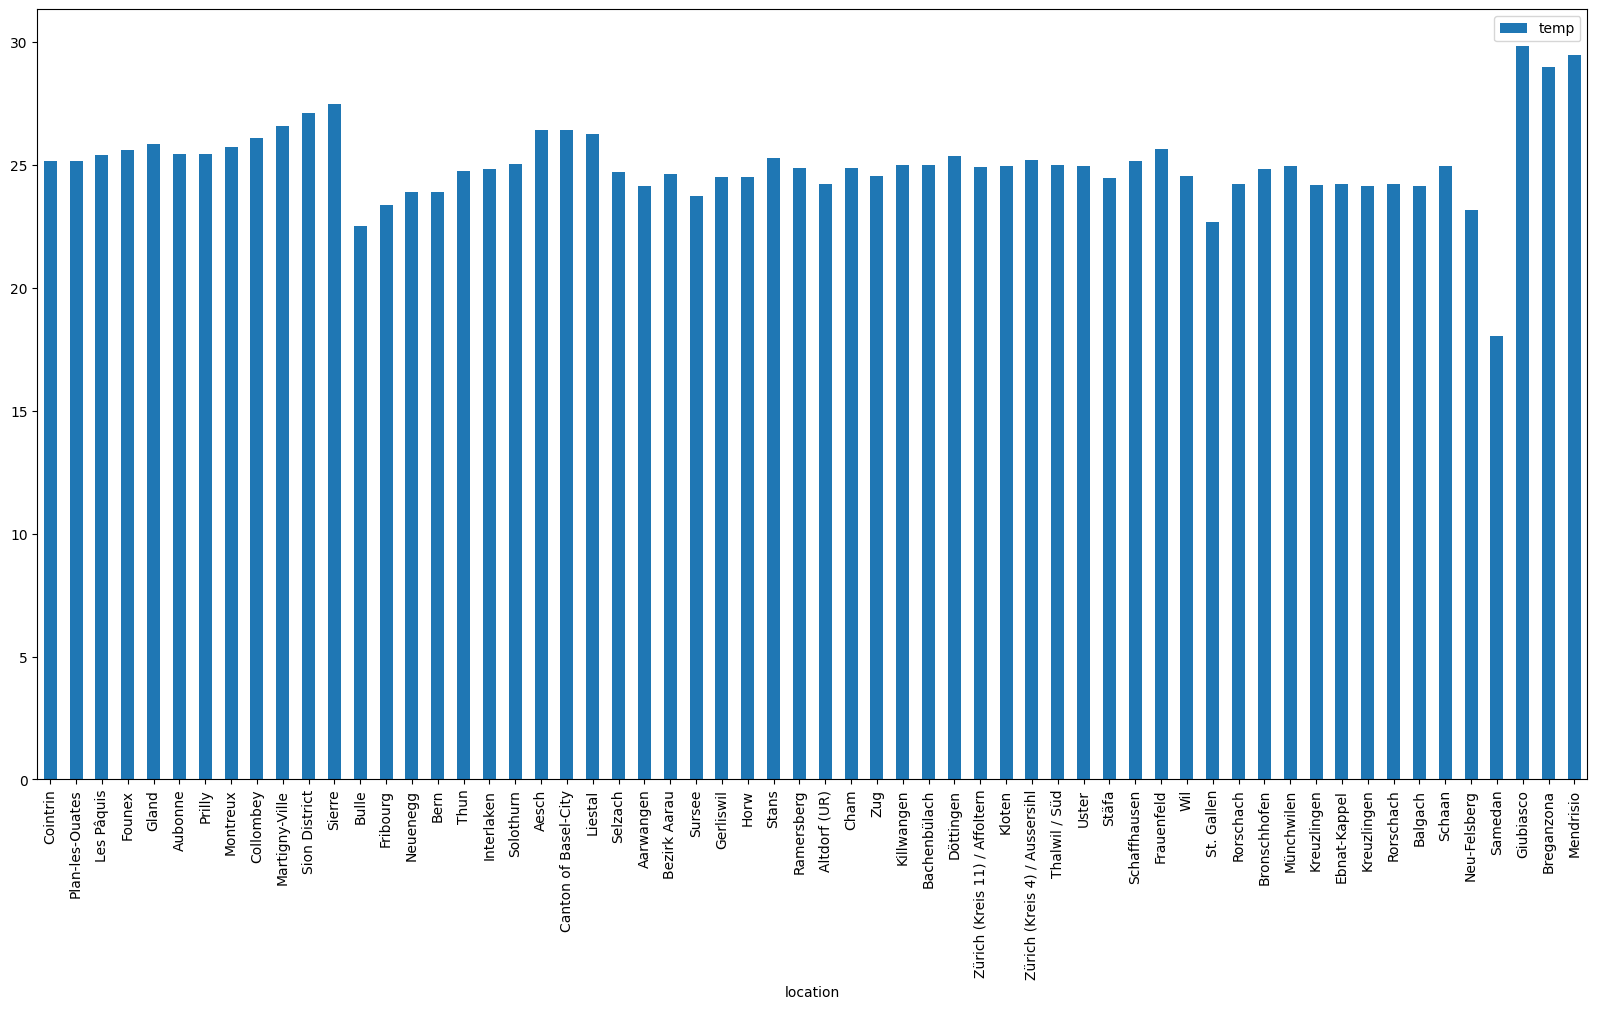

In [35]:
# plot temperature  by location
df.plot(x='location', y='temp', kind='bar', figsize=(20,10))
                

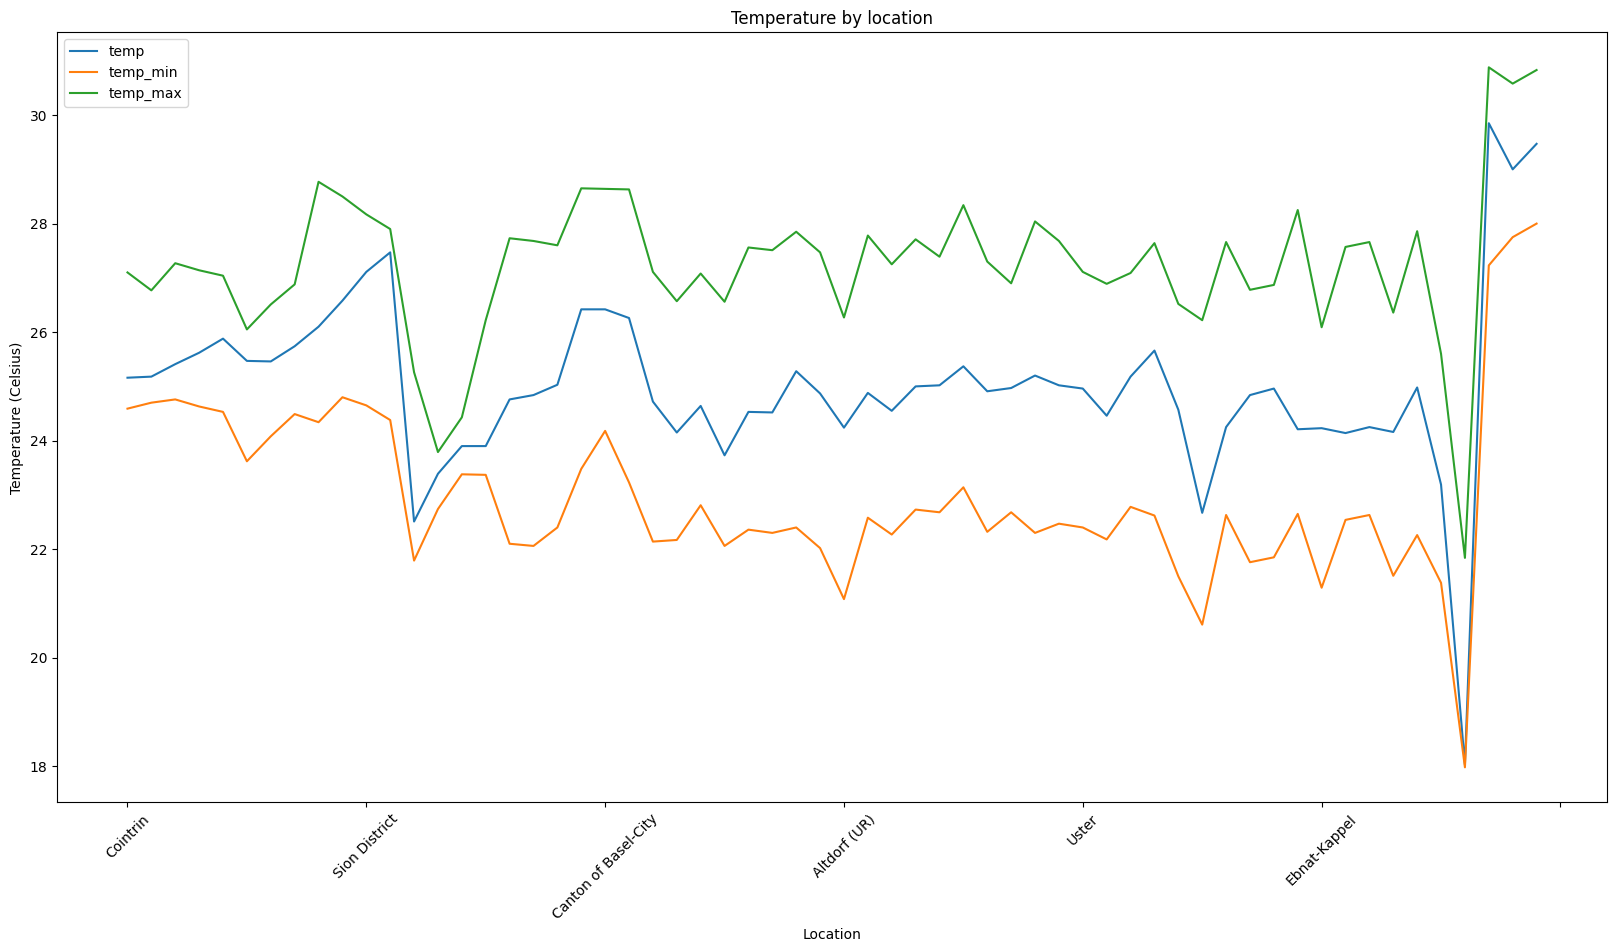

In [33]:
# Plot temperature together with temp min and temp max for each location
df.plot(x='location', y=['temp', 'temp_min', 'temp_max'], kind='line', figsize=(20,10))
# add legend
plt.legend(loc='upper left')
# add title
plt.title('Temperature by location')
# add x labels and rotate 45 degrees
plt.xlabel('Location')
plt.xticks(rotation=45)
# add  y labels
plt.ylabel('Temperature (Celsius)')
plt.show()


# Transposed parameter table

In [11]:
# transpose the first row to column names
df = df.T
df_fields = df.loc[:,:0]
df_fields


,0
id_weather,19989
weather_main,Clear
weather_description,clear sky
temp,23.54
temp_fells,23.33
temp_min,20.66
temp_max,25.52
pressure,1013
humidity,53
sea_level,1013.0


In [14]:
# Add a new column to df_fields with the data type of each value in the column '0'
df_fields['data_type'] = df_fields[0].apply(lambda x: type(x))  
df_fields.rename(columns={0:'value'}, inplace=True)
df_fields

C:\Users\eduar\AppData\Local\Temp\ipykernel_10492\2362286960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fields['data_type'] = df_fields[0].apply(lambda x: type(x))
C:\Users\eduar\AppData\Local\Temp\ipykernel_10492\2362286960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fields.rename(columns={0:'value'}, inplace=True)


,value,data_type
id_weather,19989,<class 'int'>
weather_main,Clear,<class 'str'>
weather_description,clear sky,<class 'str'>
temp,23.54,<class 'float'>
temp_fells,23.33,<class 'float'>
temp_min,20.66,<class 'float'>
temp_max,25.52,<class 'float'>
pressure,1013,<class 'int'>
humidity,53,<class 'int'>
sea_level,1013.0,<class 'float'>


In [16]:
# rename the column '0' to 'value'
df_fields.rename(columns={0:'value'}, inplace=True)
# rename the index to 'field'
df_fields.index.name = 'field'
df_fields

C:\Users\eduar\AppData\Local\Temp\ipykernel_10492\3074415547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fields.rename(columns={0:'value'}, inplace=True)


,value,data_type
field,,
id_weather,19989,<class 'int'>
weather_main,Clear,<class 'str'>
weather_description,clear sky,<class 'str'>
temp,23.54,<class 'float'>
temp_fells,23.33,<class 'float'>
temp_min,20.66,<class 'float'>
temp_max,25.52,<class 'float'>
pressure,1013,<class 'int'>
humidity,53,<class 'int'>


# DAG

In [2]:
#ENDPOINT = 'datalake1.ca31qnpiwvep.us-east-1.rds.amazonaws.com'       #My own data base shared point
#DB_NAME = 'datalake1'
#USERNAME = 'edu'
#PASSWORD = 'Edupac23984'

ENDPOINT = 'sharedmobility.cnls2nxrzngg.us-east-1.rds.amazonaws.com'   #Nithu's shared point
DB_NAME = 'sharedmobility'
USERNAME = 'nithu'
PASSWORD = 'DWH_2023'

import json
import os
import psycopg2
import pandas as pd
import requests
import numpy as np
import datetime   

"""
ENDPOINT = os.environ['ENDPOINT']
DB_NAME = os.environ['DB_NAME']
USERNAME = os.environ['USERNAME']
PASSWORD = os.environ['PASSWORD']
"""

try:
    print("host={} dbname={} user={} password={}".format(ENDPOINT, DB_NAME, USERNAME, PASSWORD))
    conn = psycopg2.connect("host={} dbname={} user={} password={}".format(ENDPOINT, DB_NAME, USERNAME, PASSWORD))

except psycopg2.Error as e:
    print("Error: Could not make connection to the Postgres database")
    print(e)

    
try:    
    cur = conn.cursor()
    
except psycopg2.Error as e:
    print("Error: Could not get curser to the Database")
    print(e)

# Auto commit is very important
conn.set_session(autocommit=True)
    
    #####################
    ##### My script #####
    #####################
    
# Fetch mobility station's data
API = "https://sharedmobility.ch/station_information.json"
response = requests.get(API)
data = response.json()
data = data['data']['stations']
    
# Slice first 100 stations
data = data[:100]  
    
# API parameters
API_KEY = "f929f8bae1cf9df1f10a9a2a99661e67"
units = "metric"
current_weather = []

# Fetch station's  weather data
for i in range(len(data)):
    LAT = data[i]['lat']
    LON = data[i]['lon']
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={LAT}&lon={LON}&&units={units}&appid={API_KEY}"
    response = requests.get(url)
    r = json.loads(response.text)
    current_weather.append(r)
    #time.sleep(1)
        
# Define function to extract weather values from each mobility station
def extract_weather_values(location): 
    try:
        sea_level = location['main']['sea_level']
    except KeyError:
        sea_level = None
            
    try:        
            ground_level = location['main']['grnd_level']
    except KeyError:
            ground_level = None
            
    try:        
            wind_gust = location['wind']['gust']
    except KeyError:
            wind_gust = None
        
    values = {        
            'id_weather': location['sys']['id'],
            'weather_main': location['weather'][0]['main'],
            'weather_description': location['weather'][0]['description'],
            'temp': location['main']['temp'],
            'temp_fells': location['main']['feels_like'],
            'temp_min': location['main']['temp_min'],
            'temp_max': location['main']['temp_max'],
            'pressure': location['main']['pressure'],
            'humidity': location['main']['humidity'],
            'sea_level': sea_level,
            'ground_level': ground_level,
            'visibility': location['visibility'],       
            'wind_speed': location['wind']['speed'],
            'wind_degrees': location['wind']['deg'],
            'wind_gust': wind_gust,
            'datetime': datetime.datetime.utcfromtimestamp(location['dt']/1000.0).isoformat(),
            'country_code': location['sys']['country'],
            'sunrise': datetime.datetime.utcfromtimestamp(location['sys']['sunrise']/1000.0).isoformat(),
            'sunset': datetime.datetime.utcfromtimestamp(location['sys']['sunset']/1000.0).isoformat(),        
            'timezone': location['timezone'],
            'location': location['name'],      
        }
                
    return values
        
# Extract values for all coordinate locations
list_locations = []
for i, weather_data in enumerate(current_weather):
    values = extract_weather_values(weather_data)
    list_locations.append(values)
    
    ############################
    ##### End of My script #####
    ############################

    cur.execute("CREATE TABLE IF NOT EXISTS weather (id_weather varchar(255), weather_main varchar(255), weather_description varchar(255), temp float(24), temp_fells float(24), temp_min float(24), temp_max float(24), pressure int, humidity int, sea_level int, ground_level int, visibility int, wind_speed float(24), wind_degrees int, wind_gust float(24), datetime timestamp, country_code varchar(255), sunrise timestamp, sunset timestamp, timezone int, location varchar(255));")

try:    
    # getting weather variables
    for i, item in enumerate(list_locations):        
        id_weather= item.get('id_weather', None)
        weather_main= item.get('weather_main', None)
        weather_description= item.get('weather_description', None)
        temp= item.get('temp', None)
        temp_fells= item.get('temp_fells', None)
        temp_min= item.get('temp_min', None)
        temp_max= item.get('temp_max', None)
        pressure= item.get('pressure', None)
        humidity= item.get('humidity', None)
        sea_level= item.get('sea_level', None)
        ground_level= item.get('ground_level', None)
        visibility= item.get('visibility', None)   
        wind_speed= item.get('wind_speed', None)
        wind_degrees= item.get('wind_degrees', None)
        wind_gust= item.get('wind_gust', None)
        datetime= item.get('datetime', None)
        country_code= item.get('country_code', None)
        sunrise= item.get('sunrise', None)
        sunset= item.get('sunset', None)
        timezone= item.get('timezone', None)
        location= item.get('location', None) 
 
        cur.execute("INSERT INTO weather (id_weather, weather_main, weather_description, temp, temp_fells, temp_min, temp_max, pressure, humidity, sea_level, ground_level, visibility, wind_speed, wind_degrees, wind_gust, datetime, country_code, sunrise, sunset, timezone, location) VALUES (%s, %s, %s,%s, %s, %s,%s, %s, %s,%s, %s, %s, %s, %s, %s,%s, %s, %s,%s, %s, %s)", 
                    (id_weather, weather_main, weather_description, temp, temp_fells, temp_min, temp_max, pressure, humidity, sea_level, ground_level, visibility, wind_speed, wind_degrees, wind_gust, datetime, country_code, sunrise, sunset, timezone, location))
  
                 
except psycopg2.Error as e:
    print("Error: Inserting Rows")
    print (e)


try:
    cur.execute("SELECT * FROM weather;")
    
except psycopg2.Error as e:
    print("Error: select *")
    print (e)

row = cur.fetchone()

while row:
    print(row)
    row = cur.fetchone()

cur.close()
conn.close()

host=sharedmobility.cnls2nxrzngg.us-east-1.rds.amazonaws.com dbname=sharedmobility user=nithu password=DWH_2023
('2080788', 'Rain', 'light rain', 5.7, 2.89, 3.91, 7.19, 1018, 85, 1018, 963, 1743, 3.7, 63, 9.31, datetime.datetime(1970, 1, 20, 11, 12, 20, 794000), 'CH', datetime.datetime(1970, 1, 20, 11, 11, 18, 530000), datetime.datetime(1970, 1, 20, 11, 12, 8, 261000), 7200, 'Matzingen')
('2080788', 'Rain', 'light rain', 5.7, 2.89, 3.91, 7.19, 1018, 85, 1018, 963, 1744, 3.7, 63, 9.31, datetime.datetime(1970, 1, 20, 11, 12, 20, 795000), 'CH', datetime.datetime(1970, 1, 20, 11, 11, 18, 530000), datetime.datetime(1970, 1, 20, 11, 12, 8, 261000), 7200, 'Matzingen')
('6933', 'Clouds', 'overcast clouds', 5.96, 2.97, 3.93, 8.42, 1016, 82, None, None, 10000, 4.12, 20, None, datetime.datetime(1970, 1, 20, 11, 12, 20, 795000), 'CH', datetime.datetime(1970, 1, 20, 11, 11, 18, 749000), datetime.datetime(1970, 1, 20, 11, 12, 8, 396000), 7200, 'Sempach')
('6937', 'Clouds', 'broken clouds', 8.56, 8.5